Устанавливаем пакеты

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Импортируем модули

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import itertools
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from pandas import DataFrame
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras import models
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

# РАБОТА С ИСХОДНЫМИ ДАННЫМИ

Прочтем исходные данные

In [7]:
x_bp_df = pd.read_excel('C:\\DSVKR\X_bp.xlsx', sheet_name='X_bp.csv')
x_nup_df = pd.read_excel('C:\\DSVKR\X_nup.xlsx', sheet_name='X_nup.csv')

In [8]:
x_bp_df.head(5)

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

Метод .info (). Этот метод печатает информацию о DataFrame, включая индекс dtype и dtypes столбца, ненулевые значения и использование памяти.

In [9]:
x_bp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

Метод .describe () Этот метод используется для получения сводки числовых значений в нашем наборе данных Он вычисляет среднее значение, стандартное отклонение, минимальное значение, максимальное значение, 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениями. Он также подсчитывает количество переменных в наборе данных. Итак, мы сможем увидеть, есть ли пропущенные значения в столбцах.

In [10]:
x_bp_df.describe().round(2).T

count     mean     std      min  \
Unnamed: 0                            1023.0   511.00  295.46     0.00   
Соотношение матрица-наполнитель       1023.0     2.93    0.91     0.39   
Плотность, кг/м3                      1023.0  1975.73   73.73  1731.76   
модуль упругости, ГПа                 1023.0   739.92  330.23     2.44   
Количество отвердителя, м.%           1023.0   110.57   28.30    17.74   
Содержание эпоксидных групп,%_2       1023.0    22.24    2.41    14.25   
Температура вспышки, С_2              1023.0   285.88   40.94   100.00   
Поверхностная плотность, г/м2         1023.0   482.73  281.31     0.60   
Модуль упругости при растяжении, ГПа  1023.0    73.33    3.12    64.05   
Прочность при растяжении, МПа         1023.0  2466.92  485.63  1036.86   
Потребление смолы, г/м2               1023.0   218.42   59.74    33.80   

                                          25%      50%      75%      max  
Unnamed: 0                             255.50   511.00   766.50  1022.00  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.16  1977.62  2021.37  2207.77  
модуль упругости, ГПа                  500.05   739.66   961.81  1911.54  
Количество отвердителя, м.%             92.44   110.56   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.07   285.90   313.00   413.27  
Поверхностная плотность, г/м2          266.82   451.86   693.23  1399.54  
Модуль упругости при растяжении, ГПа    71.25    73.27    75.36    82.68  
Прочность при растяжении, МПа         2135.85  2459.52  2767.19  3848.44  
Потребление смолы, г/м2                179.63   219.20   257.48   414.59

Метод nunique(). Позволяет увидеть количество уникальных записей в наборе данных или в столбце.

In [11]:
x_bp_df.nunique()

Unnamed: 0                              1023
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

Метод shape(). Позволяет определить размер датасета

In [12]:
x_bp_df.shape

(1023, 11)

In [13]:
x_nup_df.head(5)

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

In [14]:
x_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   float64
 1   Угол нашивки, град  1040 non-null   float64
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


In [15]:
x_nup_df.describe()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
count  1040.000000          1040.00000  1040.000000        1040.000000
mean    519.500000            45.00000     6.911385          57.248399
std     300.366443            45.02165     2.555181          12.332438
min       0.000000             0.00000     0.000000           0.000000
25%     259.750000             0.00000     5.102256          49.970740
50%     519.500000            45.00000     6.938000          57.413594
75%     779.250000            90.00000     8.587662          65.107235
max    1039.000000            90.00000    14.440522         103.988901

In [16]:
x_nup_df.nunique()

Unnamed: 0            1040
Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [17]:
x_nup_df.shape

(1040, 4)

Имеем 2 дата сета, в которых отсутствуют пропуски, все данные колличественные (int и float), качественных значений нет. Если не учитывать столбцы с индексами, то датасеты имеют следующие размеры:
x_bp_df содержит 1023 строки и 10 параметров
x_nup_df содержит 1040 строк и 3 параметра.

Получается, что наши датасеты содержат разное кол-во строк, и при объединении датасетов по типу INNER часть строк второго датасета (x_nup_df) будет отброшена.

Объединим данные, удалим безымянные колонки с индексами

In [18]:
bp_nup_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

In [19]:
bp_nup_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

В строке 19 объединенного датасета есть нулевые значения параметров из второго датасета (x_nup_df)

In [20]:
bp_nup_df.head(20)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         3.532338            1980.0            1183.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
12                300.000000                          470.0   
13          

Удаляем строку с нулевыми значениями

In [21]:
bp_nup_df.drop([19], axis = 0, inplace=True)

In [22]:
bp_nup_df.head(20)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
20                         2.877358            2000.0             205.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
20                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
12                300.000000                          470.0   
13          

Поучим информацию об объединенном датасете bp_nup_df

In [23]:
bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1022 non-null   float64
 1   Плотность, кг/м3                      1022 non-null   float64
 2   модуль упругости, ГПа                 1022 non-null   float64
 3   Количество отвердителя, м.%           1022 non-null   float64
 4   Содержание эпоксидных групп,%_2       1022 non-null   float64
 5   Температура вспышки, С_2              1022 non-null   float64
 6   Поверхностная плотность, г/м2         1022 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1022 non-null   float64
 8   Прочность при растяжении, МПа         1022 non-null   float64
 9   Потребление смолы, г/м2               1022 non-null   float64
 10  Угол нашивки, град                    1022 non-null   float64
 11  Шаг нашивки      

In [24]:
bp_nup_df.shape

(1022, 13)

Имеем объединенный датасет, в которых отсутствуют пропуски, все данные колличественные (int и float), качественных значений нет. Датасет имеет следующие размеры: bp_nup_df содержит 1022 строки и 13 параметров.

# РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ

Необходимо:

нарисовать гистограммы распределения каждой из переменной
диаграммы ящика с усами
попарные графики рассеяния точек
для каждой колонке получить среднее и медианное значение
провести анализ и исключение выбросов
проверить наличие пропусков

Описательная статистика

Метод .describe () Этот метод используется для получения сводки числовых значений в нашем наборе данных Он вычисляет среднее значение, стандартное отклонение, минимальное значение, максимальное значение, 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениями. Он также подсчитывает количество переменных в наборе данных. Итак, мы сможем увидеть, есть ли пропущенные значения в столбцах.

Описательная статистика содержит по каждому столбцу (по каждой переменной):

count - количество значений
mean - среднее значение
std - стандартное отклонение
min - минимум
25% - верхнее значение первого квартиля
50% - медиана
75% - верхнее значение третьего квартиля
max - максимум

In [25]:
bp_nup_df.describe().round(2).T

count     mean     std      min  \
Соотношение матрица-наполнитель       1022.0     2.93    0.91     0.39   
Плотность, кг/м3                      1022.0  1975.73   73.77  1731.76   
модуль упругости, ГПа                 1022.0   739.49  330.10     2.44   
Количество отвердителя, м.%           1022.0   110.57   28.31    17.74   
Содержание эпоксидных групп,%_2       1022.0    22.24    2.41    14.25   
Температура вспышки, С_2              1022.0   285.88   40.96   100.00   
Поверхностная плотность, г/м2         1022.0   482.22  280.97     0.60   
Модуль упругости при растяжении, ГПа  1022.0    73.32    3.12    64.05   
Прочность при растяжении, МПа         1022.0  2467.38  485.65  1036.86   
Потребление смолы, г/м2               1022.0   218.34   59.71    33.80   
Угол нашивки, град                    1022.0    44.30   45.02     0.00   
Шаг нашивки                           1022.0     6.91    2.56     0.04   
Плотность нашивки                     1022.0    57.21   12.23    11.74   

                                          25%      50%      75%      max  
Соотношение матрица-наполнитель          2.32     2.91     3.55     5.59  
Плотность, кг/м3                      1924.13  1977.60  2021.38  2207.77  
модуль упругости, ГПа                  499.32   739.31   960.47  1911.54  
Количество отвердителя, м.%             92.43   110.55   129.73   198.95  
Содержание эпоксидных групп,%_2         20.61    22.23    23.96    33.00  
Температура вспышки, С_2               259.03   285.92   313.01   413.27  
Поверхностная плотность, г/м2          266.65   451.59   692.34  1399.54  
Модуль упругости при растяжении, ГПа    71.24    73.27    75.34    82.68  
Прочность при растяжении, МПа         2136.26  2460.26  2768.02  3848.44  
Потребление смолы, г/м2                179.60   219.19   257.40   414.59  
Угол нашивки, град                       0.00     0.00    90.00    90.00  
Шаг нашивки                              5.08     6.92     8.59    14.44  
Плотность нашивки                       49.85    57.36    64.96   103.99

Проверим наличие пропусков в данных

In [26]:
bp_nup_df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Пропусков нет

Проверим наличие дубликатов в данных

In [27]:
bp_nup_df.duplicated().sum()

0

Дубликатов нет

Построим гистрограммы распределения для каждого параметра

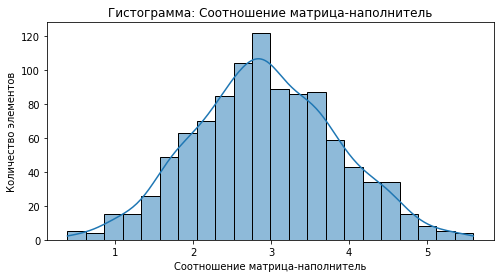

Минимальное значение: 0.389
Максимальное значение: 5.592
Среднее значение: 2.93
Медианное значение: 2.907


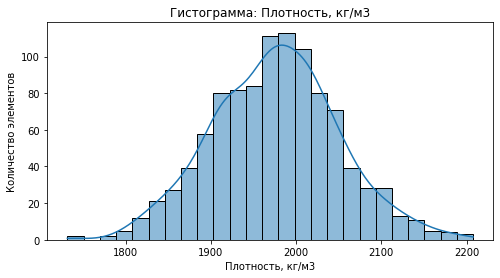

Минимальное значение: 1731.765
Максимальное значение: 2207.773
Среднее значение: 1975.731
Медианное значение: 1977.604


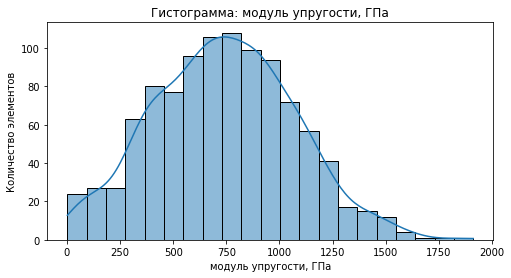

Минимальное значение: 2.437
Максимальное значение: 1911.536
Среднее значение: 739.49
Медианное значение: 739.311


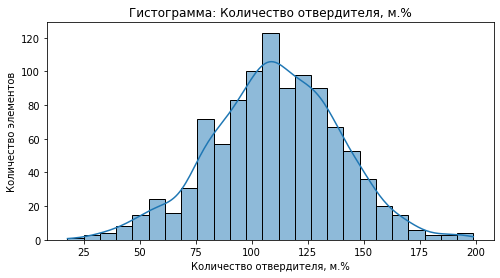

Минимальное значение: 17.74
Максимальное значение: 198.953
Среднее значение: 110.57
Медианное значение: 110.549


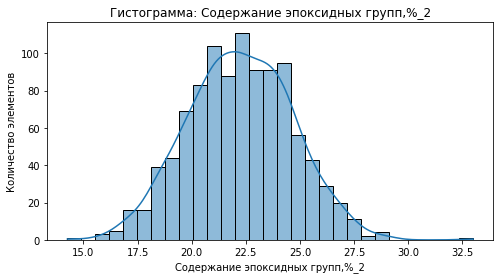

Минимальное значение: 14.255
Максимальное значение: 33.0
Среднее значение: 22.244
Медианное значение: 22.231


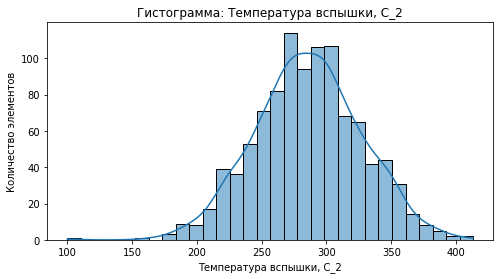

Минимальное значение: 100.0
Максимальное значение: 413.273
Среднее значение: 285.883
Медианное значение: 285.922


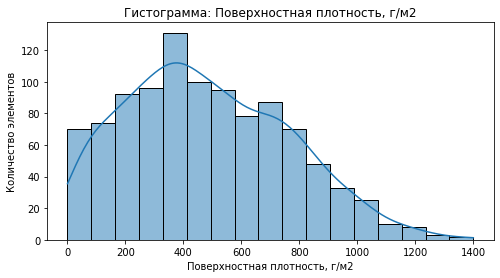

Минимальное значение: 0.604
Максимальное значение: 1399.542
Среднее значение: 482.216
Медианное значение: 451.589


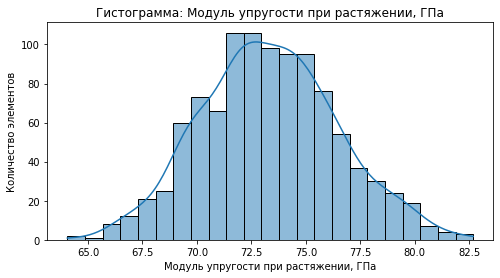

Минимальное значение: 64.054
Максимальное значение: 82.682
Среднее значение: 73.324
Медианное значение: 73.267


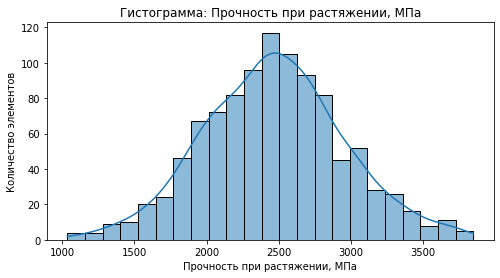

Минимальное значение: 1036.857
Максимальное значение: 3848.437
Среднее значение: 2467.38
Медианное значение: 2460.261


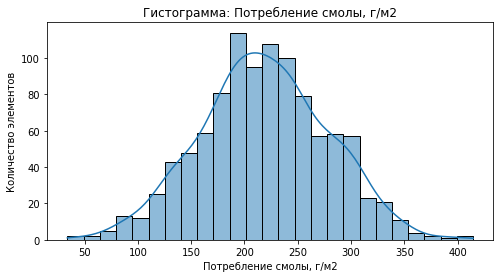

Минимальное значение: 33.803
Максимальное значение: 414.591
Среднее значение: 218.343
Медианное значение: 219.189


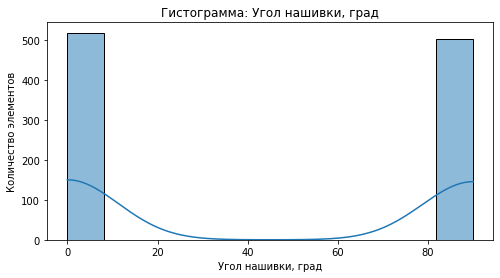

Минимальное значение: 0.0
Максимальное значение: 90.0
Среднее значение: 44.295
Медианное значение: 0.0


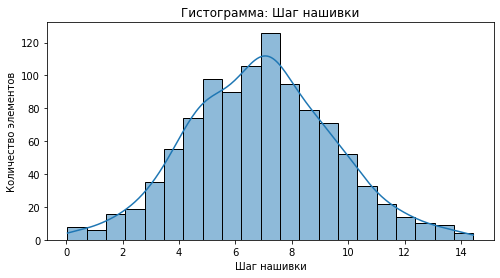

Минимальное значение: 0.038
Максимальное значение: 14.441
Среднее значение: 6.906
Медианное значение: 6.922


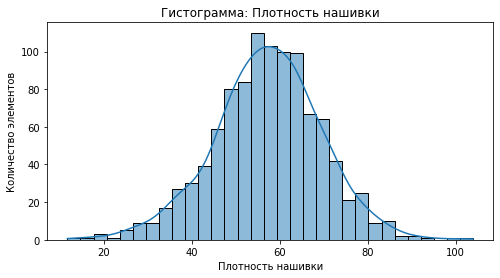

Минимальное значение: 11.74
Максимальное значение: 103.989
Среднее значение: 57.21
Медианное значение: 57.363


In [28]:
for col in bp_nup_df.columns:
    plt.figure(figsize=(8,4))
    plt.title('Гистограмма:'+ ' ' + col)
    plt.ylabel('Количество элементов')
    sns.histplot(data = bp_nup_df[col], kde=True)
    plt.savefig('C:\\DSVKR\Гистограмма.pdf')
    plt.show()
    print(f'Минимальное значение: {bp_nup_df[col].min().round(3)}')
    print(f'Максимальное значение: {bp_nup_df[col].max().round(3)}')
    print(f'Среднее значение: {bp_nup_df[col].mean().round(3)}')
    print(f'Медианное значение: {bp_nup_df[col].median().round(3)}')

Гистограммы свидетельствуют о нормальном распределении данных (кроме угла нашивки, там есть только 2 значения: 0 градусов и 90 градусов). Имеются выбросы, например отчетливо они наблюдаются в гистограммах следующих параметров: Соотношение матрица-наполнитель, кол-во отвердителя, поверхностная плотность

Построим ящик с усами, чтобы убедиться в наличии выбросов

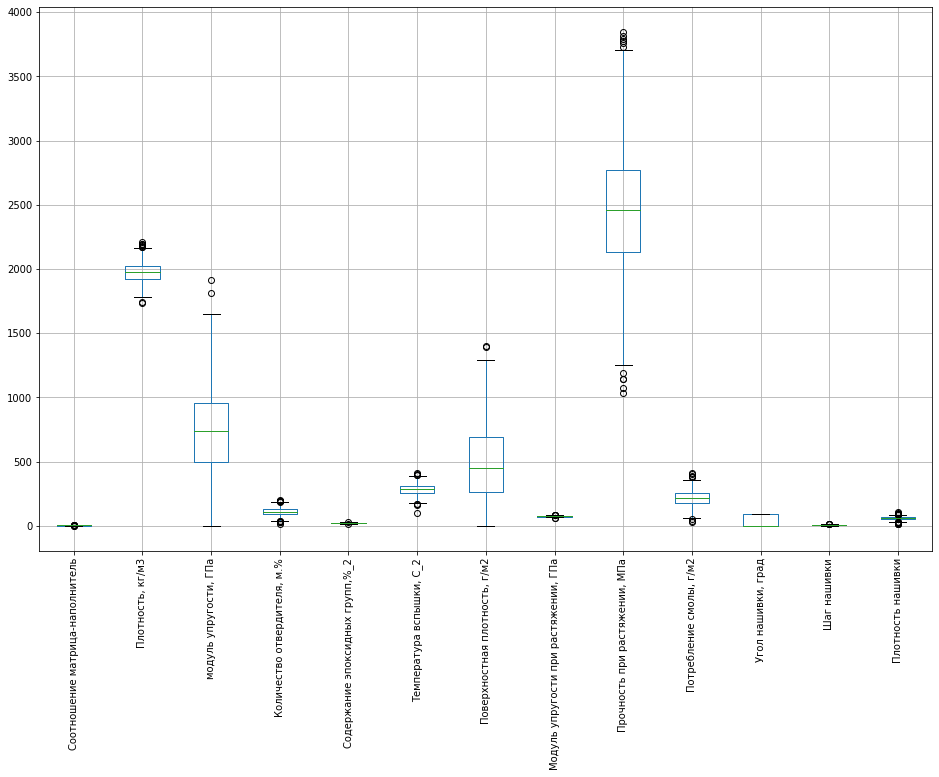

In [29]:
boxplot = bp_nup_df.boxplot(rot=90, figsize=(16,10))

Ящик с усами показывает, что выбросы есть во всех переменных, кроме Угла нашивки.

Построим попарные графики рассеяния точек, чтобы проследить наличие взаимосвязей между переменными

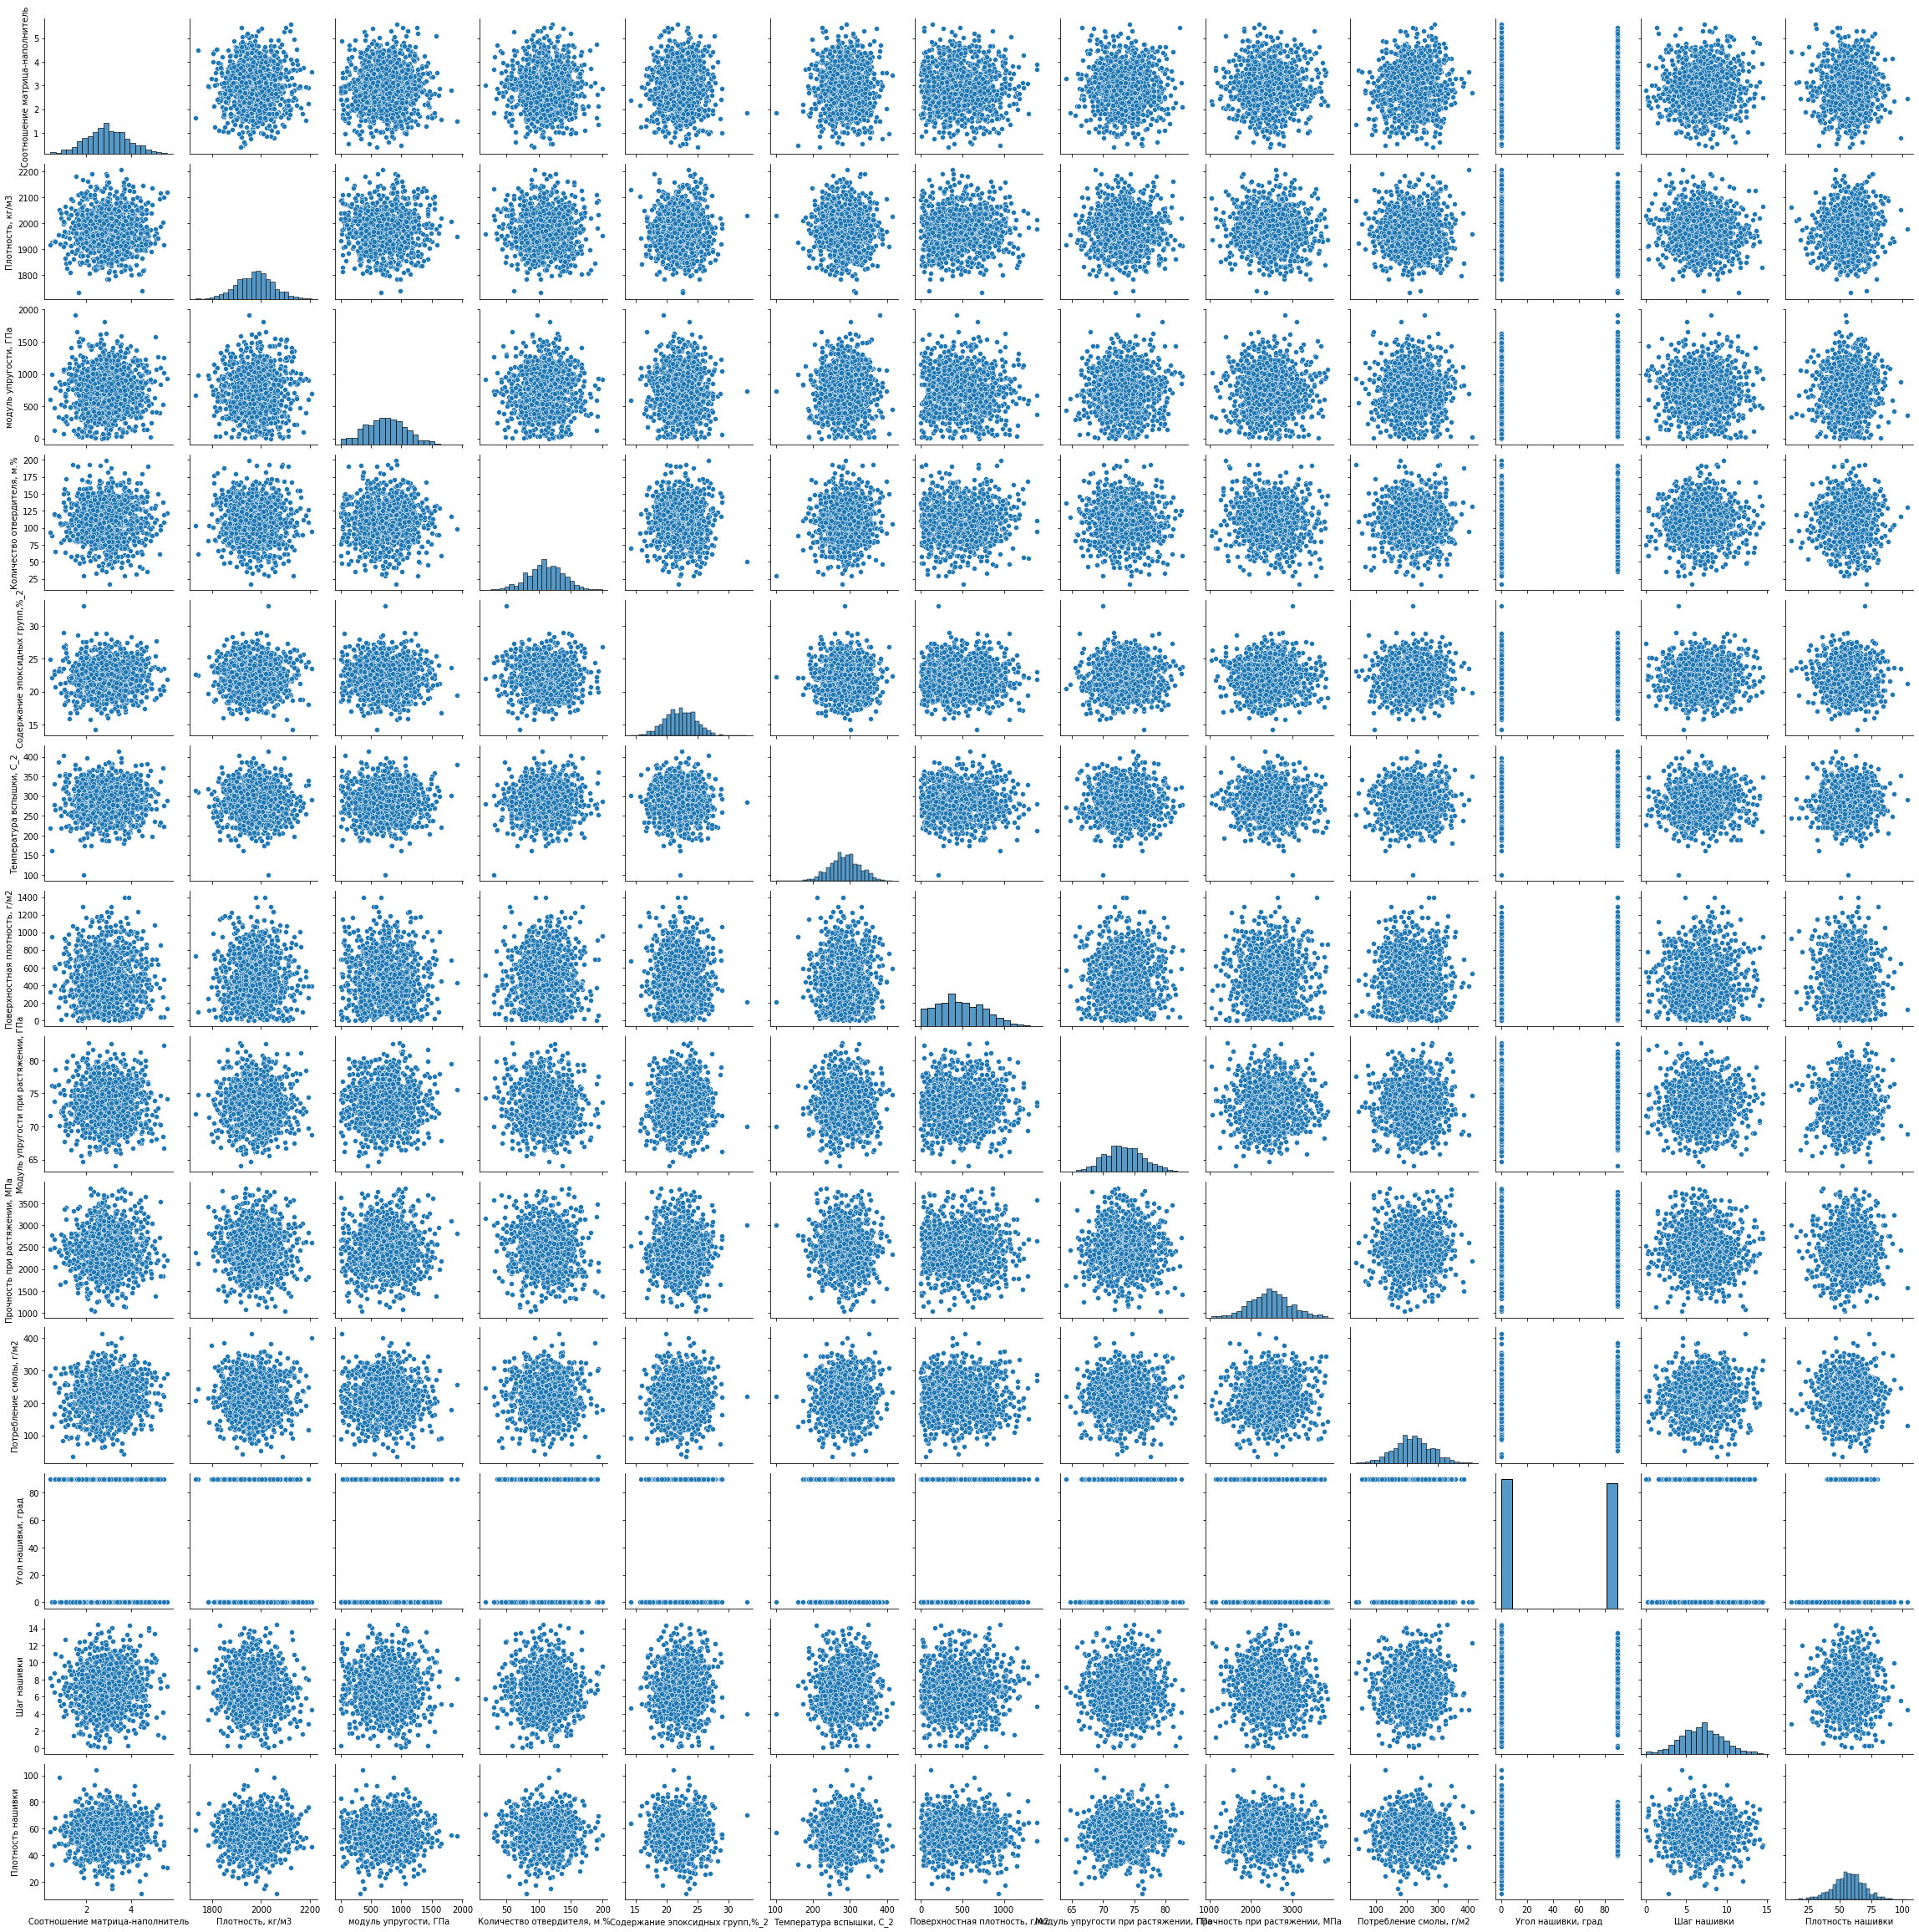

In [30]:
sns.pairplot(bp_nup_df, height=2.5)

Попарные графики рассеяния точек не показывают какой-либо корреляции между данными. Также можно проследить наличие выбросов.

Построим тепловую карту признаков

<AxesSubplot:>

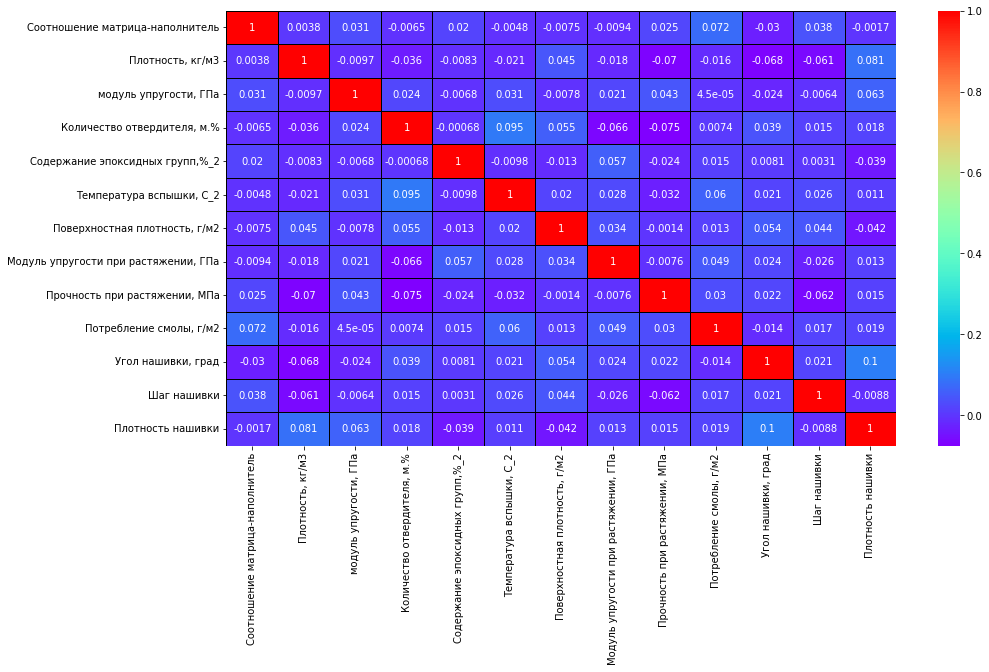

In [31]:
plt.figure(figsize = (15, 8))
sns.heatmap(bp_nup_df.corr(), cmap = "rainbow", annot = True, linewidths=1, linecolor='black')

Тепловая карта признаков показывает максимальный уровень корреляции в пределах 0,1. Это также свидетельствует об отсутствии зависимости параметров друг от друга.

Выведем среднее значение для каждого параметра

In [32]:
bp_nup_df.mean()

Соотношение матрица-наполнитель            2.929777
Плотность, кг/м3                        1975.730715
модуль упругости, ГПа                    739.489694
Количество отвердителя, м.%              110.569507
Содержание эпоксидных групп,%_2           22.244367
Температура вспышки, С_2                 285.883391
Поверхностная плотность, г/м2            482.215915
Модуль упругости при растяжении, ГПа      73.324000
Прочность при растяжении, МПа           2467.379714
Потребление смолы, г/м2                  218.343323
Угол нашивки, град                        44.295499
Шаг нашивки                                6.905973
Плотность нашивки                         57.209853
dtype: float64

Выведем медианное значение для каждого параметра

In [33]:
bp_nup_df.median()

Соотношение матрица-наполнитель            2.906630
Плотность, кг/м3                        1977.603973
модуль упругости, ГПа                    739.310747
Количество отвердителя, м.%              110.549159
Содержание эпоксидных групп,%_2           22.230545
Температура вспышки, С_2                 285.922290
Поверхностная плотность, г/м2            451.588705
Модуль упругости при растяжении, ГПа      73.266770
Прочность при растяжении, МПа           2460.260972
Потребление смолы, г/м2                  219.189018
Угол нашивки, град                         0.000000
Шаг нашивки                                6.922196
Плотность нашивки                         57.362576
dtype: float64

In [34]:
bp_nup_df.describe().transpose()[["mean", "std"]]

mean         std
Соотношение матрица-наполнитель          2.929777    0.913475
Плотность, кг/м3                      1975.730715   73.765207
модуль упругости, ГПа                  739.489694  330.101862
Количество отвердителя, м.%            110.569507   28.309736
Содержание эпоксидных групп,%_2         22.244367    2.407479
Температура вспышки, С_2               285.883391   40.963286
Поверхностная плотность, г/м2          482.215915  280.967801
Модуль упругости при растяжении, ГПа    73.324000    3.117080
Прочность при растяжении, МПа         2467.379714  485.645758
Потребление смолы, г/м2                218.343323   59.710570
Угол нашивки, град                      44.295499   45.016514
Шаг нашивки                              6.905973    2.555608
Плотность нашивки                       57.209853   12.226746

# ПРЕДОБРАБОТКА ДАННЫХ

Проведем очистку от выбросов

Рассмотрим 2 способа определения количества выбросов: метод 3х сигм и метод межквартильных расстояний. Выберем способ, при котором наименьшее количество выбросов будет отброшено, поскольку исходя их разведочного анализа данных можно сделать предположение о том, что в смоделированной выборке было слишком мало "реальных" данных, полученных опытных путем. Чтобы эти "реальные" данные (в том числе) не попали в выбросы, постараемся выбросить поменьше.

Метод 3х сигм

In [35]:
count_3s = 0
count_iq = 0
for column in bp_nup_df:
    d = bp_nup_df.loc[:, [column]]
    zscore = (bp_nup_df[column] - bp_nup_df[column].mean()) / bp_nup_df[column].std()
    d['3s'] = zscore.abs() > 3
    count_3s += d['3s'].sum()
print('Метод 3-х сигм, выбросов:', count_3s)

Метод 3-х сигм, выбросов: 24


Метод межквартильных расстояний

In [36]:
count_3s = 0
count_iq = 0
for column in bp_nup_df:
    d = bp_nup_df.loc[:, [column]]
    q1 = np.quantile(bp_nup_df[column], 0.25)
    q3 = np.quantile(bp_nup_df[column], 0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    d['iq'] = (bp_nup_df[column] <= lower) | (bp_nup_df[column] >= upper)
    count_iq += d['iq'].sum()
print('Метод межквартильных расстояний, выбросов:', count_iq)

Метод межквартильных расстояний, выбросов: 92


Удаляем выбросы методом 3х сигм

In [37]:
clean_outliers_bp_nup_df = bp_nup_df[(np.abs(stats.zscore(bp_nup_df)) <= 3).all(axis=1)]
clean_outliers_bp_nup_df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

Получилось 24 выброса (1023 - 999)

Построим тепловую карту для данных без выбросов, чтобы посмотреть, как изменилась корреляция

<AxesSubplot:>

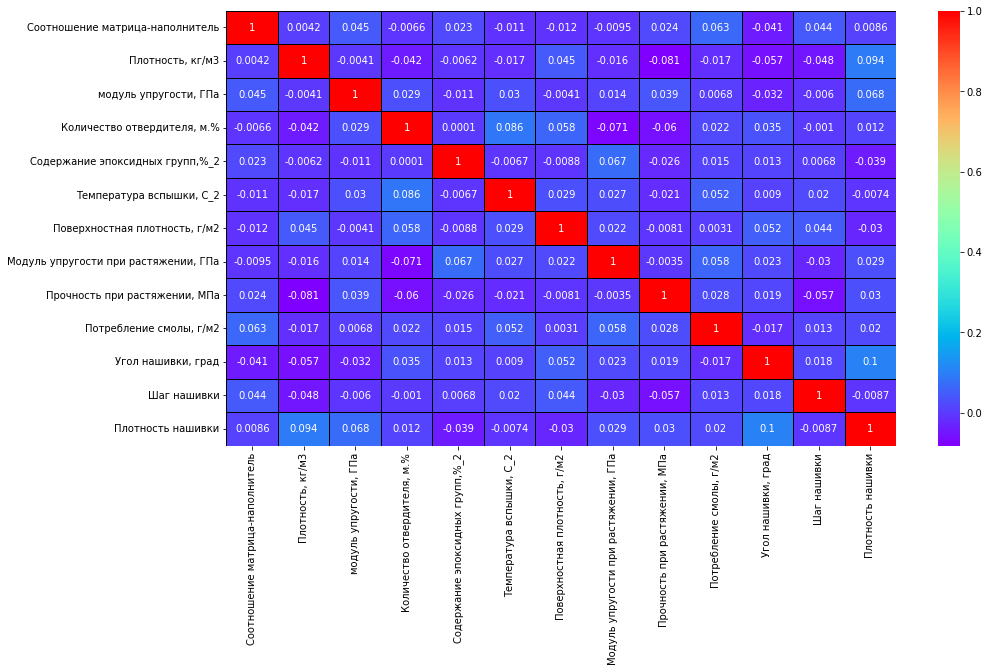

In [38]:
corrmat = clean_outliers_bp_nup_df.corr()
  
f, ax = plt.subplots(figsize =(15, 8))
sns.heatmap(corrmat, ax = ax, cmap ="rainbow", annot = True, linewidths=1, linecolor='black')

Видим, что максимальная степень корреляции достигла значения 0,1. Это все еще очень слабый показатель, свидетельсвующий об отсутствии взаимосвязи между параметрами.

Нормализация данных

Исследуем разброс диапазонов данных

<AxesSubplot:ylabel='Density'>

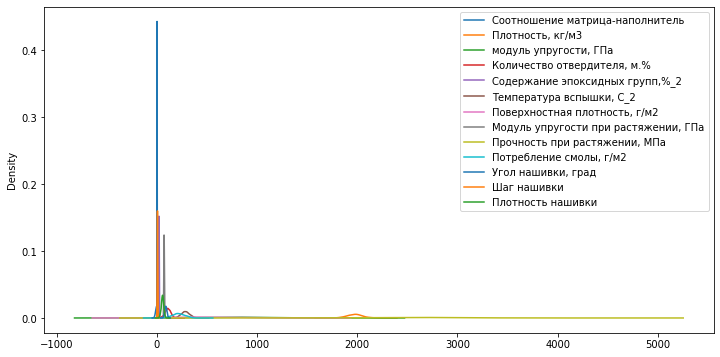

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
clean_outliers_bp_nup_df.plot(kind='kde', ax=ax)

Нормализуем данные, приведем их к диапазону от 0 до 1

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(clean_outliers_bp_nup_df), columns = clean_outliers_bp_nup_df.columns, index=clean_outliers_bp_nup_df.index)

In [42]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.601381   
3                            0.282131          0.601381   
4                            0.457857          0.601381   
5                            0.457201          0.527898   
6                            0.419084          0.307448   
...                               ...               ...   
1018                         0.361750          0.410540   
1019                         0.587163          0.650588   
1020                         0.555750          0.460227   
1021                         0.637396          0.691520   
1022                         0.657131          0.259472   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.447061                     0.123047   
3                  0.447061                     0.608021   
4                  0.455721                     0.502800   
5                  0.452685                     0.502800   
6                  0.488508                     0.502800   
...                     ...                          ...   
1018               0.552781                     0.350139   
1019               0.268550                     0.712271   
1020               0.251612                     0.494656   
1021               0.448724                     0.684130   
1022               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.162230                              0.321894   
3                          0.162230                              0.321894   
4                          0.162230                              0.321894   
5                          0.162230                              0.321894   
6                          0.162230                              0.321894   
...                             ...                                   ...   
1018                       0.161609                              0.489229   
1019                       0.271207                              0.480019   
1020                       0.572959                              0.578197   
1021                       0.496511                              0.540754   
1022                       0.587373                              0.555208   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.698235                 0.517418   
3                          0.698235                 0.517418   
4                          0.698235                 0.517418   
5                          0.698235                 0.517418   
6                          0.698235                 0.517418   
...                             ...                      ...   
1018                       0.480312                 0.242759   
1019                       0.470745                 0.221717   
1020                       0.578340                 0.565435   
1021                       0.368070                 0.451281   
1022                       0.647135                 0.444423   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [43]:
df_norm.describe().round(2).T

count  mean   std  min   25%   50%  \
Соотношение матрица-наполнитель       999.0  0.49  0.17  0.0  0.37  0.48   
Плотность, кг/м3                      999.0  0.47  0.18  0.0  0.34  0.47   
модуль упругости, ГПа                 999.0  0.45  0.20  0.0  0.30  0.45   
Количество отвердителя, м.%           999.0  0.50  0.17  0.0  0.38  0.50   
Содержание эпоксидных групп,%_2       999.0  0.49  0.18  0.0  0.37  0.49   
Температура вспышки, С_2              999.0  0.49  0.17  0.0  0.37  0.49   
Поверхностная плотность, г/м2         999.0  0.37  0.22  0.0  0.21  0.35   
Модуль упругости при растяжении, ГПа  999.0  0.50  0.17  0.0  0.39  0.50   
Прочность при растяжении, МПа         999.0  0.51  0.17  0.0  0.39  0.50   
Потребление смолы, г/м2               999.0  0.51  0.17  0.0  0.40  0.51   
Угол нашивки, град                    999.0  0.50  0.50  0.0  0.00  0.00   
Шаг нашивки                           999.0  0.48  0.18  0.0  0.35  0.48   
Плотность нашивки                     999.0  0.51  0.16  0.0  0.41  0.51   

                                       75%  max  
Соотношение матрица-наполнитель       0.61  1.0  
Плотность, кг/м3                      0.58  1.0  
модуль упругости, ГПа                 0.58  1.0  
Количество отвердителя, м.%           0.61  1.0  
Содержание эпоксидных групп,%_2       0.62  1.0  
Температура вспышки, С_2              0.61  1.0  
Поверхностная плотность, г/м2         0.53  1.0  
Модуль упругости при растяжении, ГПа  0.61  1.0  
Прочность при растяжении, МПа         0.61  1.0  
Потребление смолы, г/м2               0.63  1.0  
Угол нашивки, град                    1.00  1.0  
Шаг нашивки                           0.59  1.0  
Плотность нашивки                     0.61  1.0

Построим графики распределния для нормализованных данных

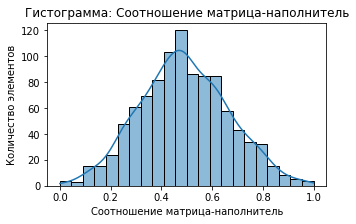

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.49
Медианное значение: 0.484


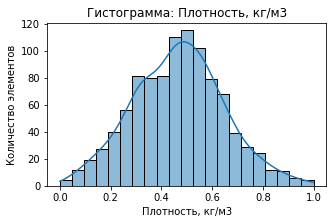

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.468
Медианное значение: 0.472


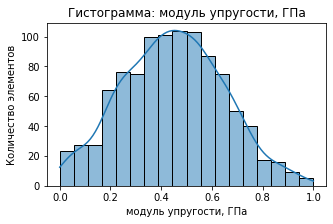

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.447
Медианное значение: 0.448


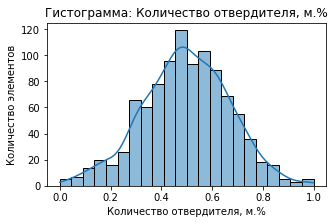

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.497
Медианное значение: 0.496


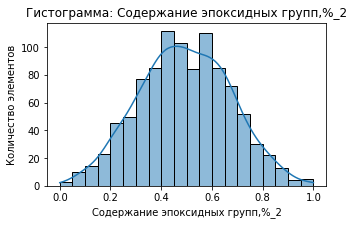

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.493
Медианное значение: 0.492


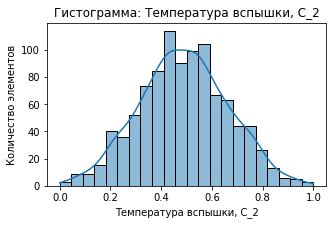

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.489
Медианное значение: 0.488


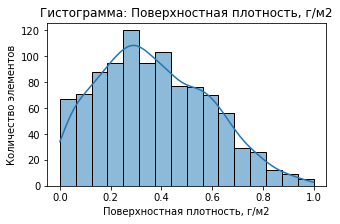

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.371
Медианное значение: 0.349


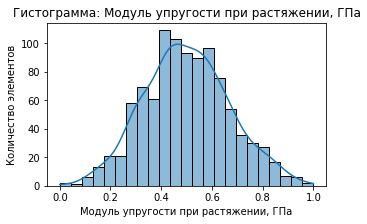

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.501
Медианное значение: 0.496


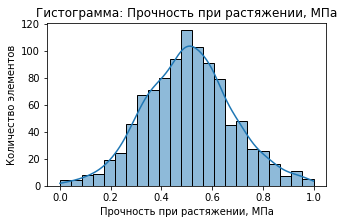

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.508
Медианное значение: 0.505


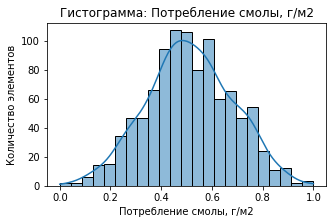

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.512
Медианное значение: 0.513


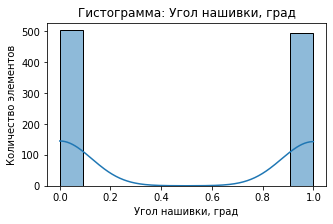

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.496
Медианное значение: 0.0


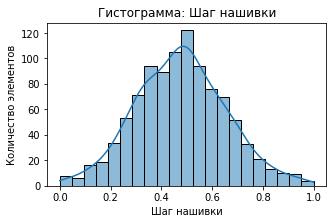

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.477
Медианное значение: 0.478


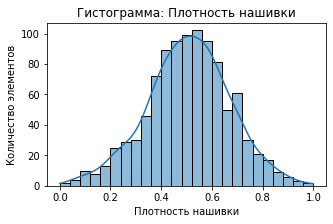

Минимальное значение: 0.0
Максимальное значение: 1.0
Среднее значение: 0.507
Медианное значение: 0.51


In [44]:
for col in df_norm.columns:
    plt.figure(figsize=(5,3))
    plt.title('Гистограмма:'+ ' ' + col)
    plt.ylabel('Количество элементов')
    sns.histplot(data = df_norm[col], kde=True)
    plt.savefig('C:\\DSVKR\Гистограмма.pdf')
    plt.show()
    print(f'Минимальное значение: {df_norm[col].min().round(3)}')
    print(f'Максимальное значение: {df_norm[col].max().round(3)}')
    print(f'Среднее значение: {df_norm[col].mean().round(3)}')
    print(f'Медианное значение: {df_norm[col].median().round(3)}')

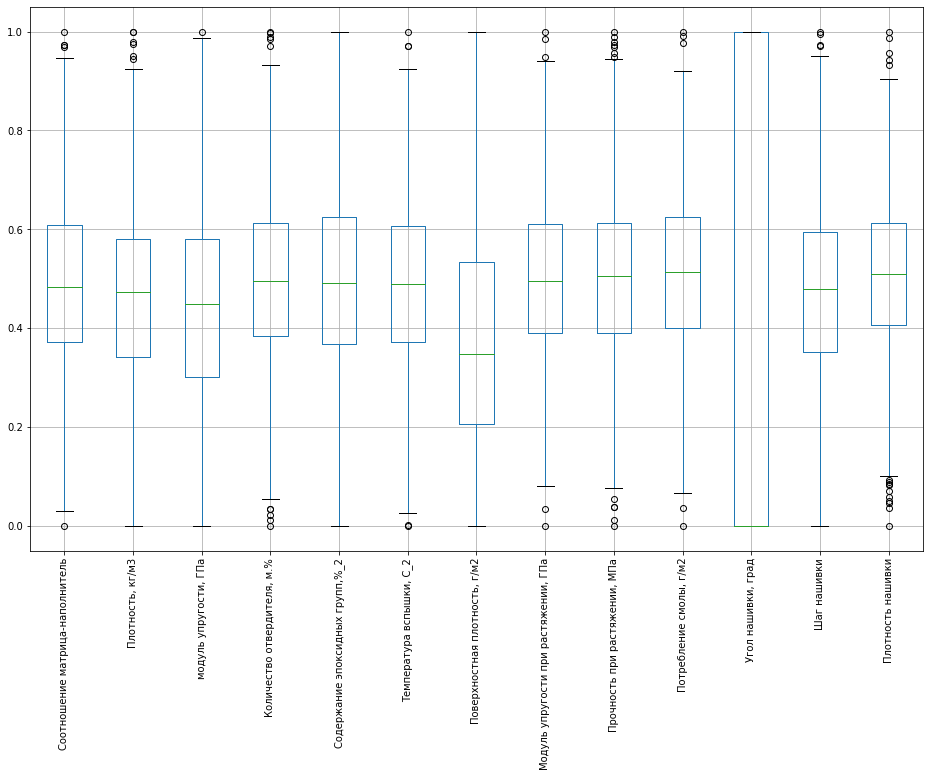

In [45]:
boxplot = df_norm.boxplot(rot=90, figsize=(16,10))

In [46]:
from matplotlib.backends.backend_pdf import PdfPages

In [47]:
pdf = PdfPages("Figures.pdf")

In [48]:
pdf.close()

# ОБУЧЕНИЕ МОДЕЛЕЙ для прогноза модуля упругости при растяжении и прочности при растяжении

Определим входные и выходные данные, разобъемданные на обучающую и тестовую выборки в соотношении 70% на 30%

In [49]:
x_upr = df_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_norm[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Размеры тестовой и обучающей выборки для прогноза Модуля упругости при растяжении

In [50]:
print("Размер тренировочного датасета на входе:", X_train_upr.shape)
print("Размер тестового датасета на входе:", X_test_upr.shape)
print("Размер тренировочного датасета на выходе:", y_train_upr.shape)
print("Размертестового датасета на выходе:", y_test_upr.shape)

Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размертестового датасета на выходе: (300, 1)


Размеры тестовой и обучающей выборки для прогноза Прочности при растяжении

In [51]:
print("Размер тренировочного датасета на входе:", X_train_pr.shape)
print("Размер тестового датасета на входе:", X_test_pr.shape)
print("Размер тренировочного датасета на выходе:", y_train_pr.shape)
print("Размертестового датасета на выходе:", y_test_pr.shape)

Размер тренировочного датасета на входе: (699, 12)
Размер тестового датасета на входе: (300, 12)
Размер тренировочного датасета на выходе: (699, 1)
Размертестового датасета на выходе: (300, 1)


Линейная регрессия

*n_jobs - позволяет ускорить кросс-валидацию, выполняя её параллельно, число определяет количество одновременно запущенных задач
cv - количество фолдов, на которые разбивается выборка при кросс-валидации
best_params_ - лучший набор параметров

In [52]:
import tensorflow as tf

In [53]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam

In [54]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [55]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.0


In [56]:
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [57]:
lr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  LinearRegression_upr  0.131349      -0.0

In [58]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [59]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.025


In [60]:
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [61]:
lr_pr_result

Model       MAE  R2 score
Прочность при растяжении  LinearRegression_pr  0.141692    -0.025

Метод К ближайших соседей

In [62]:
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 5), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 121, 'weights': 'uniform'}

In [63]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: 0.004


In [64]:
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [65]:
knr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  KNeighborsRegressor_upr  0.131265     0.004

In [66]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 226, 'weights': 'distance'}

In [67]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.0


In [68]:
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [69]:
knr_pr_result

Model       MAE  R2 score
Прочность при растяжении  KNeighborsRegressor_pr  0.138447      -0.0

Случайный лес

In [70]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators – число деревьев в лесу. Оно будет изменяться от 10 до 990 с шагом 10

max_depth – глубина дерева. Она будет изменяться от 1 до 6 с шагом в 2

min_samples_leaf – минимальное число образцов в листах. Оно будет изменяться от 1 до 7

min_samples_leaf – минимальное число образцов для сплита. Оно будет изменяться от 2 до 9.


In [71]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, y_train_upr)
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Huawei\anaconda3\envs\Baumanapromejtest\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 320,
 'min_samples_split': 25,
 'min_samples_leaf': 6,
 'max_depth': 1,
 'criterion': 'poisson',
 'bootstrap': 'True'}

In [72]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.001


In [73]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [74]:
rfr_upr_result

Model       MAE  R2 score
Модуль упругости при растяжении  RandomForestRegressor_upr  0.131101    -0.001

In [75]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, y_train_pr)
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Huawei\anaconda3\envs\Baumanapromejtest\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 90,
 'min_samples_split': 30,
 'min_samples_leaf': 6,
 'max_depth': 3,
 'criterion': 'absolute_error',
 'bootstrap': 'True'}

In [76]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: 0.011


In [77]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [78]:
rfr_pr_result

Model       MAE  R2 score
Прочность при растяжении  RandomForestRegressor_pr  0.138174     0.011

#Если коэффициент R2=0, это значит, что модель прогнозирует данные с таким же результатом, как если бы мы всегда брали среднее значение прогнозируемой переменной. Если R2<0, это значит, что разработанная модель даёт прогноз даже хуже, чем простое усреднение. Очевидно, что ни одна из моделей не справляется с поставленной задачей.

Наилучшим, если так можно сказать, образом показала себя модель К ближайшиз соседей

# ПОИСК ГИПЕРПАРАМЕТРОВ

Построим для наших моделей графики и найдем лучшие гиперпараметры.

График модели Линейная регрессия

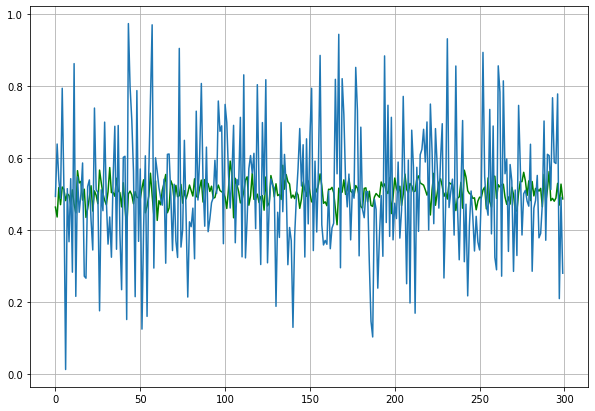

In [79]:
lr = LinearRegression()
lr.fit(X_train_pr, y_train_pr)
y_pred_lr = lr.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_lr, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True);

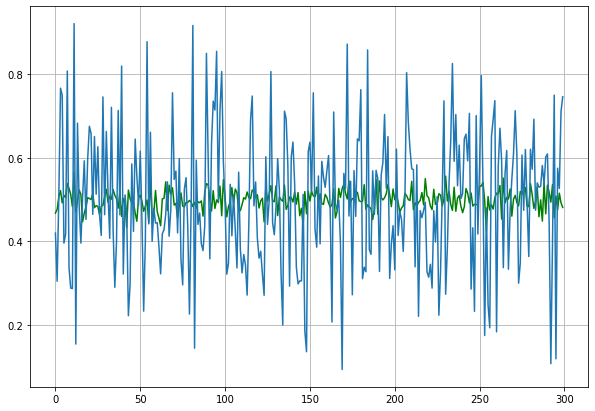

In [80]:
lr = LinearRegression()
lr.fit(X_train_upr, y_train_upr)
y_pred_lr = lr.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_lr, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True);

График модели K ближайших соседей

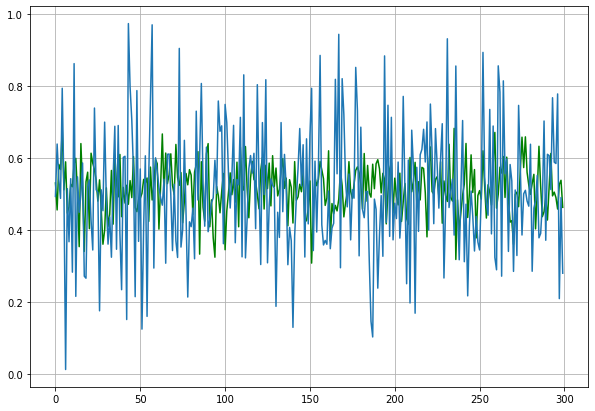

In [81]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_pr, y_train_pr)
y_pred_knn = knn.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_knn, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True);

Поиск лучших гиперпараметров

In [82]:
param_grid = {"n_neighbors": range(1, 50)}
gs = GridSearchCV(knn, param_grid, cv = 10, verbose = 1, n_jobs=-1)
gs.fit(X_train_pr, y_train_pr)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


{'n_neighbors': 39}

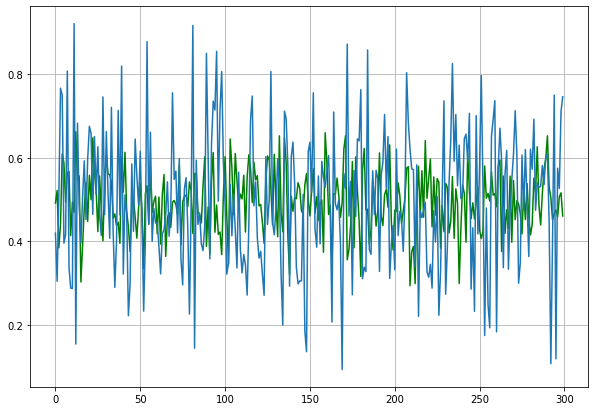

In [83]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_upr, y_train_upr)
y_pred_knn = knn.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_knn, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True);

Поиск лучших гиперпараметров

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {"n_neighbors": range(1, 50)}
gs = GridSearchCV(knn, param_grid, cv = 10, verbose = 1, n_jobs=-1)
gs.fit(X_train_upr, y_train_upr)
knn_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


{'n_neighbors': 47}

График модели Случайный лес

In [86]:
n_estimators = [5,7,9,11,15,20,40]
max_depth = [1,2,3,4,5]
min_samples_split = [23,24,25,26]
min_samples_leaf = [3,4,5,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10, verbose = 1, n_jobs=-1)
gs.fit(X_train_pr, y_train_pr)
rfr_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


C:\Users\Huawei\anaconda3\envs\Baumanapromejtest\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 25,
 'n_estimators': 7}

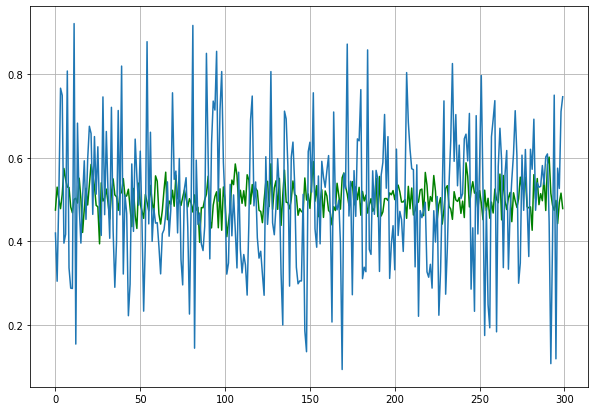

In [87]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=18)
rfr.fit(X_train_upr, y_train_upr.values[:, 0])
y_pred_upr_forest = rfr.predict(X_test_upr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_upr_forest, "g", label="prediction")
plt.plot(y_test_upr.values, label="actual")
plt.grid(True);

Поиск лучших гиперпараметров

In [88]:
n_estimators = [5,7,9,11,15,20,40]
max_depth = [1,2,3,4,5]
min_samples_split = [23,24,25,26]
min_samples_leaf = [3,4,5,6]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10, verbose = 1, n_jobs=-1)
gs.fit(X_train_upr, y_train_upr)
rfr_3 = gs.best_estimator_
gs.best_params_

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


C:\Users\Huawei\anaconda3\envs\Baumanapromejtest\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 23,
 'n_estimators': 5}

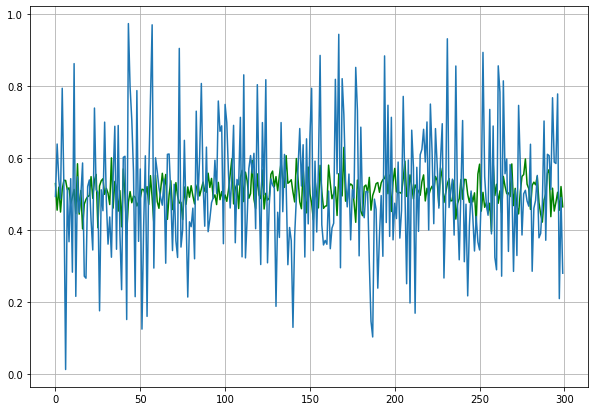

In [89]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=18)
rfr.fit(X_train_pr, y_train_pr.values[:, 0])
y_pred_pr_forest = rfr.predict(X_test_pr)
plt.figure(figsize=(10, 7))
plt.plot(y_pred_pr_forest, "g", label="prediction")
plt.plot(y_test_pr.values, label="actual")
plt.grid(True);

Наилучшим образом обучилась модель К ближайших соседей.

# НАПИСАНИЕ НЕЙРОННОЙ СЕТИ, КОТОРАЯ БУДЕТ РЕКОМЕНДОВАТЬ СООТНОШЕНИЕ МАТРИЦА-НАПОЛНИТЕЛЬ

Создаем выборку

In [90]:
input_columns_names = ["Модуль упругости при растяжении, ГПа",
                      "Прочность при растяжении, МПа",
                      "Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Соотношение матрица-наполнитель"]
                    
X = df_norm[input_columns_names]
y = df_norm[output_columns_names]

Делим выборку на тестовую и обучающую в соотношении 20% на 80%

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [92]:
knn = KNeighborsRegressor()
param_grid = {
   'n_neighbors': [1, 2, 5, 10, 20]
}
GSCV = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, verbose=2)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n

{'n_neighbors': 20}

In [93]:
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
np.mean((y_test - prediction)*(y_test - prediction))

C:\Users\Huawei\anaconda3\envs\Baumanapromejtest\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Соотношение матрица-наполнитель    0.037823
dtype: float64

In [94]:
Очень хороший результат, ошибка маленькая

SyntaxError: invalid syntax (429395173.py, line 1)

# ПОСТРОЕНИЕ НЕЙРОННОЙ СЕТИ ДЛЯ РЕКОМЕНДАЦИИ СООТНОШЕНИЯ МАТРИЦА-НАПОЛНИТЕЛЬ

In [103]:
input_columns_names = ["Плотность, кг/м3",
                      "модуль упругости, ГПа",
                      "Количество отвердителя, м.%",
                      "Содержание эпоксидных групп,%_2",
                      "Температура вспышки, С_2",
                      "Поверхностная плотность, г/м2",
                      "Потребление смолы, г/м2",
                      "Угол нашивки, град",
                      "Шаг нашивки",
                      "Плотность нашивки"]

output_columns_names = ["Соотношение матрица-наполнитель"]
                    
X = df_norm[input_columns_names]
y = df_norm[output_columns_names]

In [104]:
print(X.shape, y.shape)

(999, 10) (999, 1)


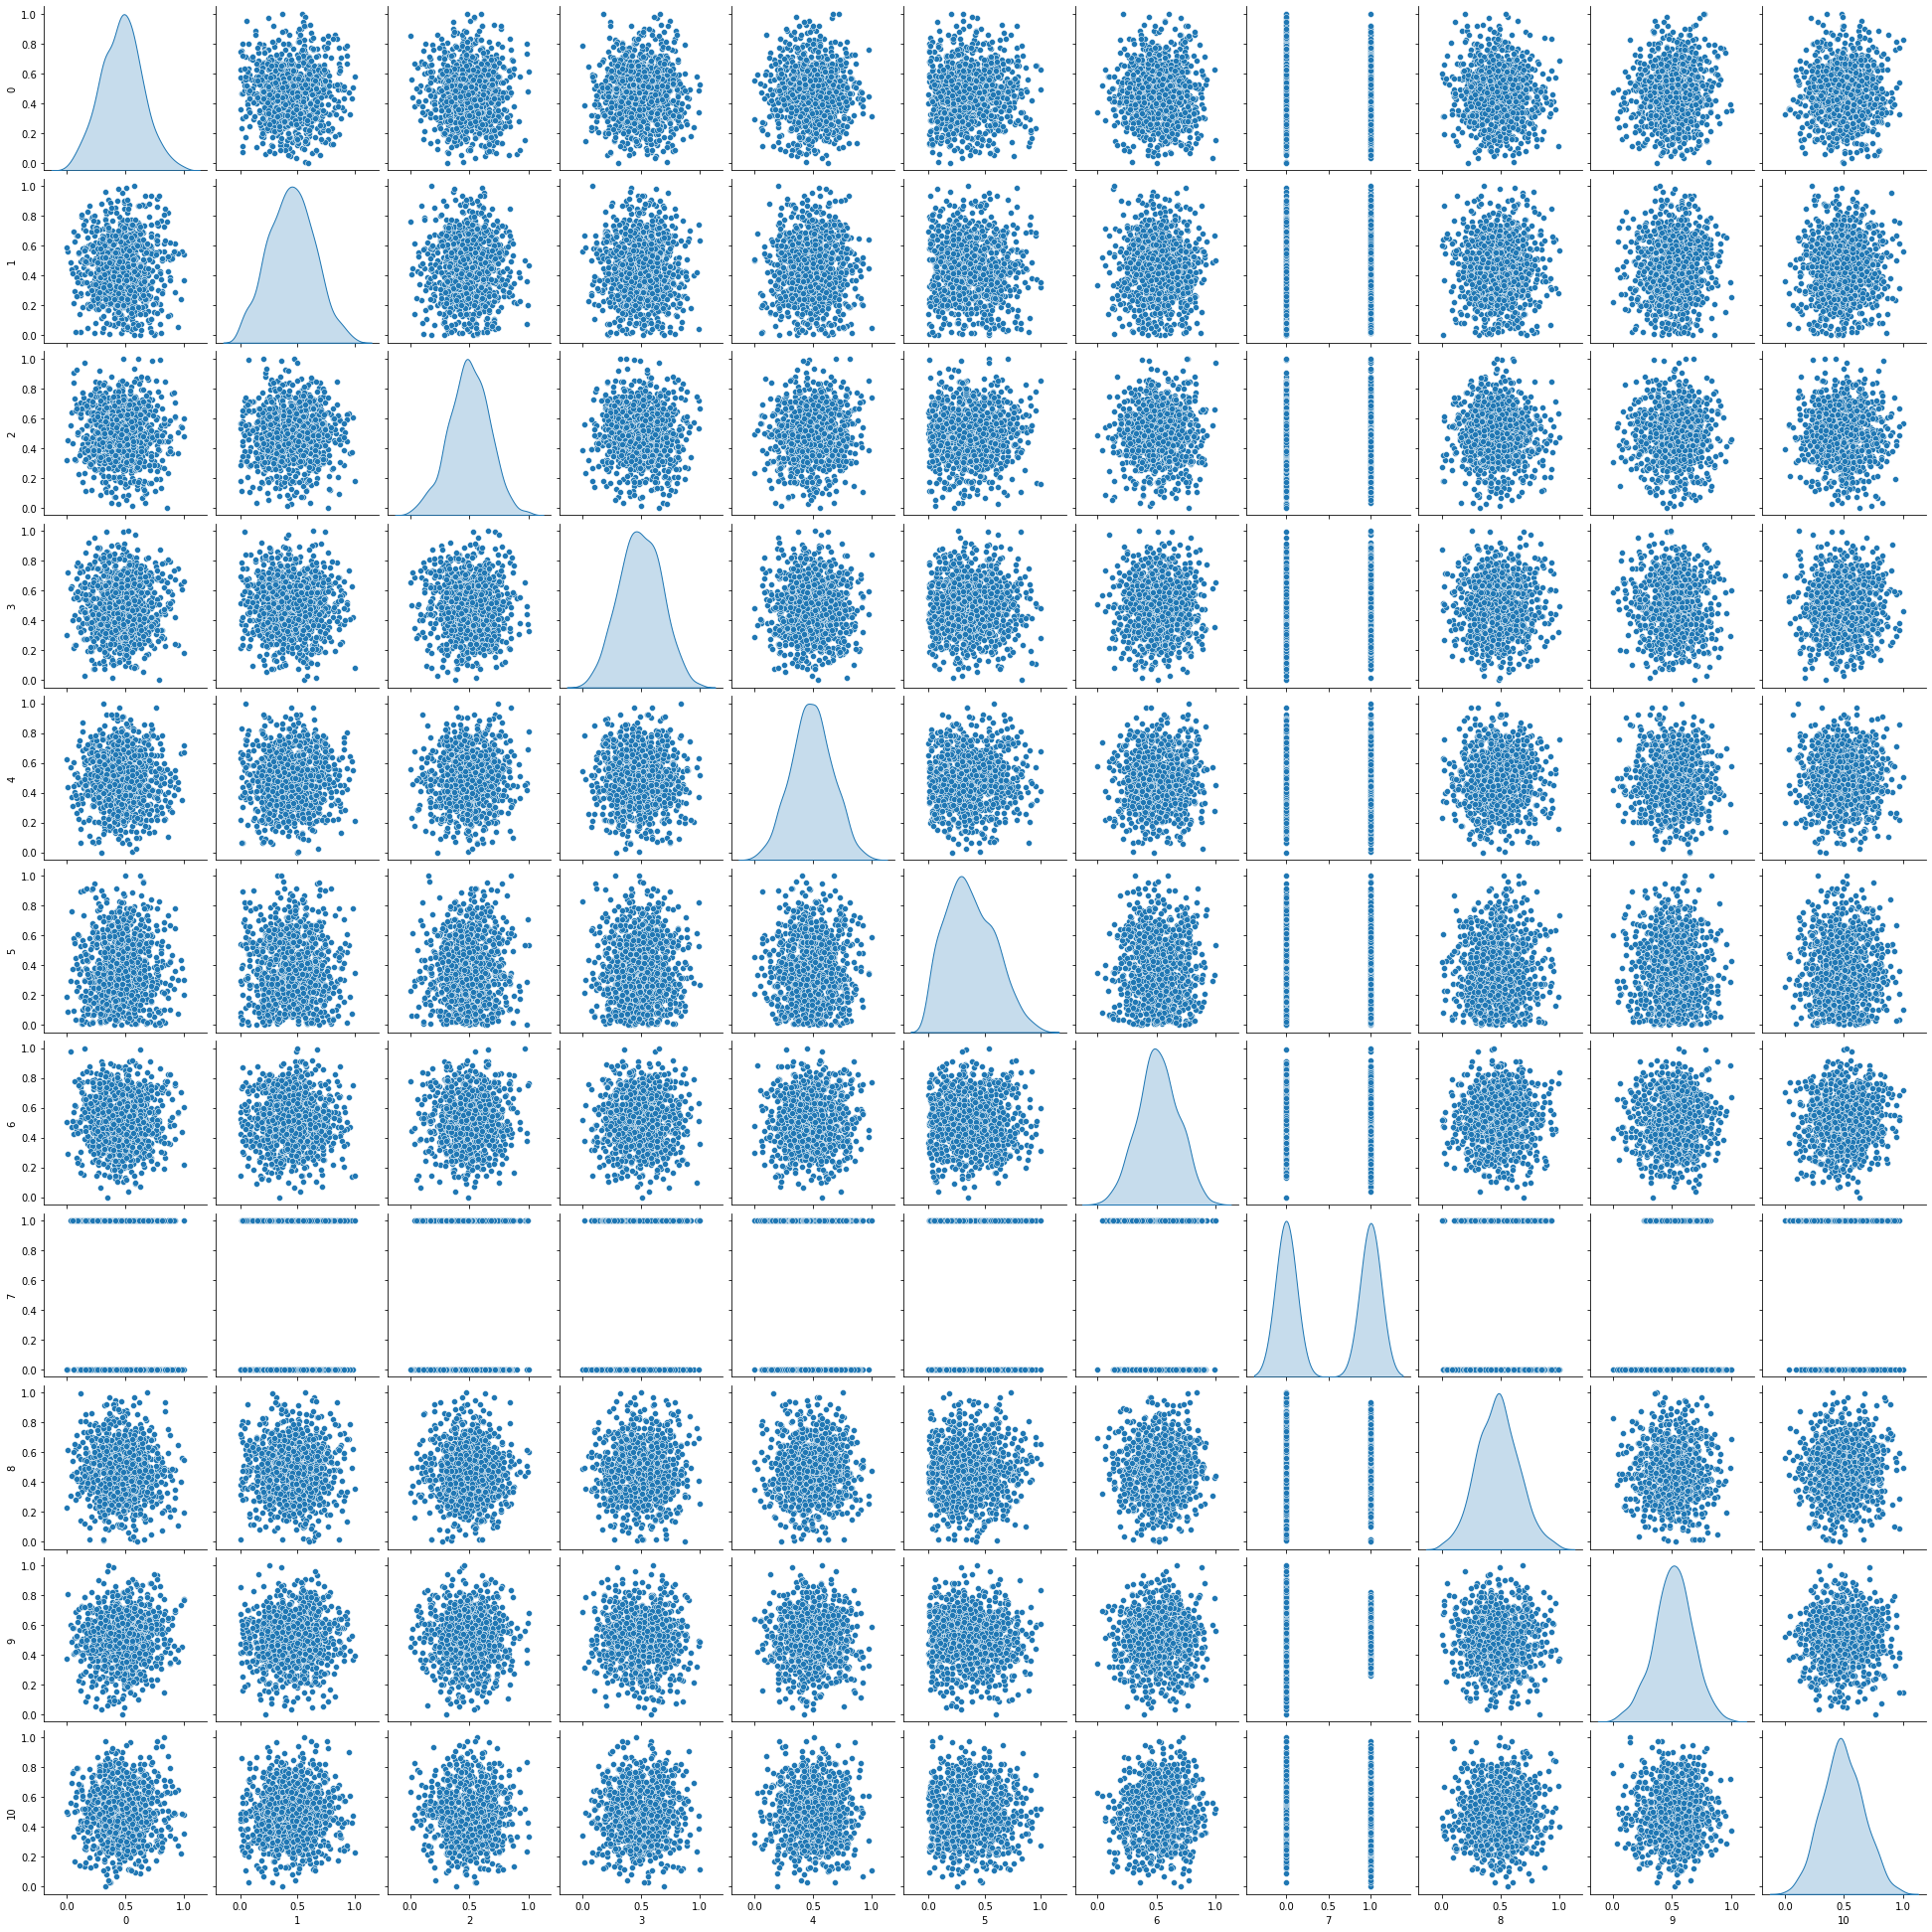

In [105]:
sns.pairplot(pd.DataFrame(np.column_stack([X, y])), diag_kind="kde")

In [107]:
pd.DataFrame(np.column_stack([X, y]))

0         1         2         3         4         5         6   \
0    0.601381  0.447061  0.123047  0.607435  0.482823  0.162230  0.517418   
1    0.601381  0.447061  0.608021  0.418887  0.549664  0.162230  0.517418   
2    0.601381  0.455721  0.502800  0.495653  0.482823  0.162230  0.517418   
3    0.527898  0.452685  0.502800  0.495653  0.482823  0.162230  0.517418   
4    0.307448  0.488508  0.502800  0.495653  0.482823  0.162230  0.517418   
..        ...       ...       ...       ...       ...       ...       ...   
994  0.410540  0.552781  0.350139  0.333908  0.657301  0.161609  0.242759   
995  0.650588  0.268550  0.712271  0.294428  0.350746  0.271207  0.221717   
996  0.460227  0.251612  0.494656  0.623085  0.325580  0.572959  0.565435   
997  0.691520  0.448724  0.684130  0.267818  0.444436  0.496511  0.451281   
998  0.259472  0.251903  0.609147  0.888354  0.553803  0.587373  0.444423   

      7         8         9         10  
0    0.0  0.275109  0.544652  0.282131  
1    0.0  0.344539  0.365074  0.282131  
2    0.0  0.344539  0.503211  0.457857  
3    0.0  0.344539  0.544652  0.457201  
4    0.0  0.344539  0.682789  0.419084  
..   ...       ...       ...       ...  
994  1.0  0.627565  0.365347  0.361750  
995  1.0  0.730963  0.458327  0.587163  
996  1.0  0.286298  0.650046  0.555750  
997  1.0  0.435716  0.520631  0.637396  
998  1.0  0.419448  0.785487  0.657131  

[999 rows x 11 columns]

Модель Сиквинтел, ожидающая кол-во входов и выходов, добавляем полносвязный слой 32т нейрона, еще один слой 64 нейрона оптимизатор адам, активация - релу

In [108]:
from keras.models import Sequential
from keras import models

In [109]:
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer="he_uniform", activation="relu"))
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer="he_uniform", activation="relu"))
    model.add(Dense(n_outputs))
    model.compile(loss="mae", optimizer="adam")
    return model

Сначала подаются инпуты на входной слой, далее идут два  скрытых слоя по 32 и 64 нейрона, затем выход, 1 нейрон

In [110]:
model = get_model(10,1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,529
Trainable params: 2,529
Non-trainable params: 0
_________________________________________________________________


In [111]:
hist = model.fit(X, y, verbose=0, epochs=200)

In [112]:
df = pd.DataFrame(hist.history)

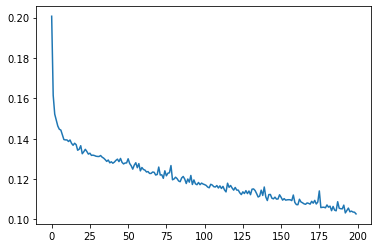

In [113]:
plt.plot(df)

In [114]:
X

Плотность, кг/м3  модуль упругости, ГПа  Количество отвердителя, м.%  \
1             0.601381               0.447061                     0.123047   
3             0.601381               0.447061                     0.608021   
4             0.601381               0.455721                     0.502800   
5             0.527898               0.452685                     0.502800   
6             0.307448               0.488508                     0.502800   
...                ...                    ...                          ...   
1018          0.410540               0.552781                     0.350139   
1019          0.650588               0.268550                     0.712271   
1020          0.460227               0.251612                     0.494656   
1021          0.691520               0.448724                     0.684130   
1022          0.259472               0.251903                     0.609147   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.607435                  0.482823   
3                            0.418887                  0.549664   
4                            0.495653                  0.482823   
5                            0.495653                  0.482823   
6                            0.495653                  0.482823   
...                               ...                       ...   
1018                         0.333908                  0.657301   
1019                         0.294428                  0.350746   
1020                         0.623085                  0.325580   
1021                         0.267818                  0.444436   
1022                         0.888354                  0.553803   

      Поверхностная плотность, г/м2  Потребление смолы, г/м2  \
1                          0.162230                 0.517418   
3                          0.162230                 0.517418   
4                          0.162230                 0.517418   
5                          0.162230                 0.517418   
6                          0.162230                 0.517418   
...                             ...                      ...   
1018                       0.161609                 0.242759   
1019                       0.271207                 0.221717   
1020                       0.572959                 0.565435   
1021                       0.496511                 0.451281   
1022                       0.587373                 0.444423   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    0.0     0.275109           0.544652  
3                    0.0     0.344539           0.365074  
4                    0.0     0.344539           0.503211  
5                    0.0     0.344539           0.544652  
6                    0.0     0.344539           0.682789  
...                  ...          ...                ...  
1018                 1.0     0.627565           0.365347  
1019                 1.0     0.730963           0.458327  
1020                 1.0     0.286298           0.650046  
1021                 1.0     0.435716           0.520631  
1022                 1.0     0.419448           0.785487  

[999 rows x 10 columns]

In [115]:
prediction = model.predict(X)

In [116]:
prediction

array([[0.52414656],
       [0.37972042],
       [0.46585813],
       [0.47375175],
       [0.51718056],
       [0.49579653],
       [0.50004   ],
       [0.5790527 ],
       [0.5507746 ],
       [0.5299263 ],
       [0.4264841 ],
       [0.44140336],
       [0.53015065],
       [0.52186024],
       [0.56018627],
       [0.5849112 ],
       [0.595438  ],
       [0.49436006],
       [0.5199214 ],
       [0.5026712 ],
       [0.67647564],
       [0.48681444],
       [0.51746356],
       [0.35727575],
       [0.5869534 ],
       [0.4643577 ],
       [0.5786307 ],
       [0.5476599 ],
       [0.4939292 ],
       [0.62606263],
       [0.53748083],
       [0.5731573 ],
       [0.4759524 ],
       [0.4150606 ],
       [0.66611946],
       [0.45835516],
       [0.64687395],
       [0.46890804],
       [0.4745389 ],
       [0.18178153],
       [0.47430342],
       [0.6343882 ],
       [0.39200705],
       [0.50093204],
       [0.37145272],
       [0.4985476 ],
       [0.5030164 ],
       [0.439

In [117]:
np.mean(np.abs((y-prediction)), axis=0)

Соотношение матрица-наполнитель    0.109656
dtype: float64

In [118]:
np.abs(y-prediction)

Соотношение матрица-наполнитель
1                            0.242016
3                            0.097590
4                            0.008001
5                            0.016551
6                            0.098096
...                               ...
1018                         0.133325
1019                         0.024736
1020                         0.037816
1021                         0.004927
1022                         0.075451

[999 rows x 1 columns]

In [119]:
np.mean((y-prediction)*(y-prediction), axis=0)

Соотношение матрица-наполнитель    0.021657
dtype: float64

In [121]:
model_path = "..//models/my_model_2"

In [122]:
model.save(model_path)

INFO:tensorflow:Assets written to: ..//models/my_model_2\assets
